# Importación de librerias

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.tools as tls
import plotly.offline as py      


import warnings

warnings.filterwarnings("ignore")

# Lectura de datos

In [3]:
df = pd.read_csv("input\loan.csv")

In [6]:
df.head(8)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Preprocesamiento de datos

In [234]:
null_percentages = df.isnull().mean() * 100



for column, percentage in null_percentages.items():

  if percentage != 0:

    print({column: [round(percentage, 5), df[column].dtype]})

{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

application_type
INDIVIDUAL    886868
JOINT            511
Name: count, dtype: int64


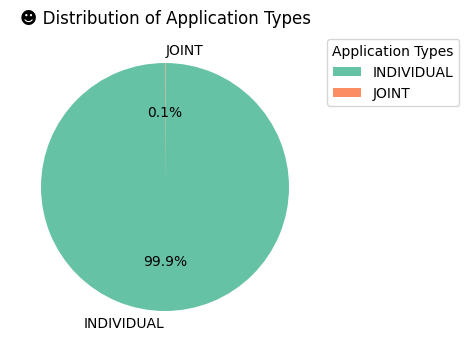

In [235]:
# Obtener los recuentos de valores para 'application_type'
application_type_counts = df['application_type'].value_counts()


print(application_type_counts)

# Configurar la figura
plt.figure(figsize=(4, 5))

# Crear el gráfico circular
plt.pie(application_type_counts.values, labels=application_type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('Set2'))

# Agregar una leyenda
plt.legend(application_type_counts.index, title="Application Types", bbox_to_anchor=(1, 1), loc="best")

# Establecer título
plt.title('☻ Distribution of Application Types')

# Mostrar la gráfico
plt.show()

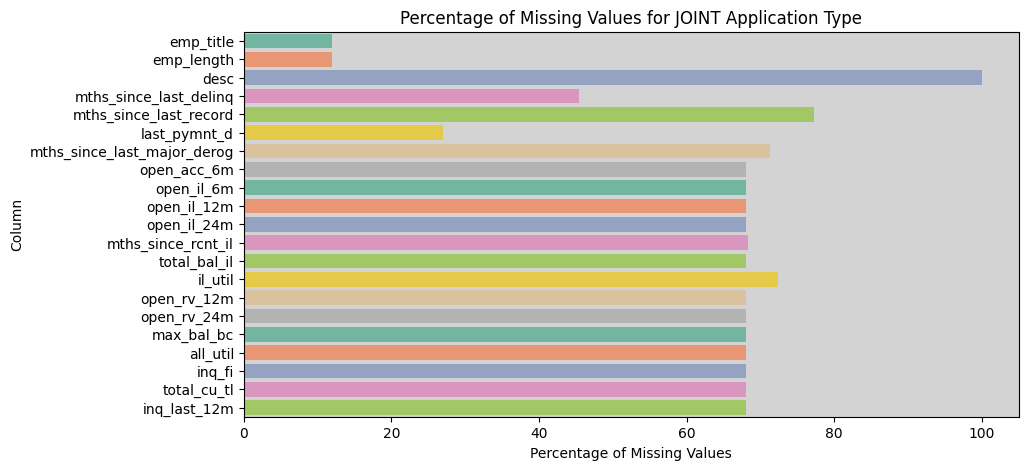

In [236]:
# Obtener el porcentaje de valores faltantes para el tipo de aplicación 'JOINT'
joint_na_percentages = df[df['application_type'] == 'JOINT'].isna().mean() * 100

# Filtrar columnas con más del 5% de valores faltantes
joint_na_percentages = joint_na_percentages[joint_na_percentages > 5]

# Configurar la figura
plt.figure(figsize=(10, 5))

# Crea el gráfico de barras usando Seaborn
sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set2')

# Agregar etiquetas y título
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for JOINT Application Type')

# Personaliza el gráfico y el color de fondo
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Mostrar la trama
plt.show()

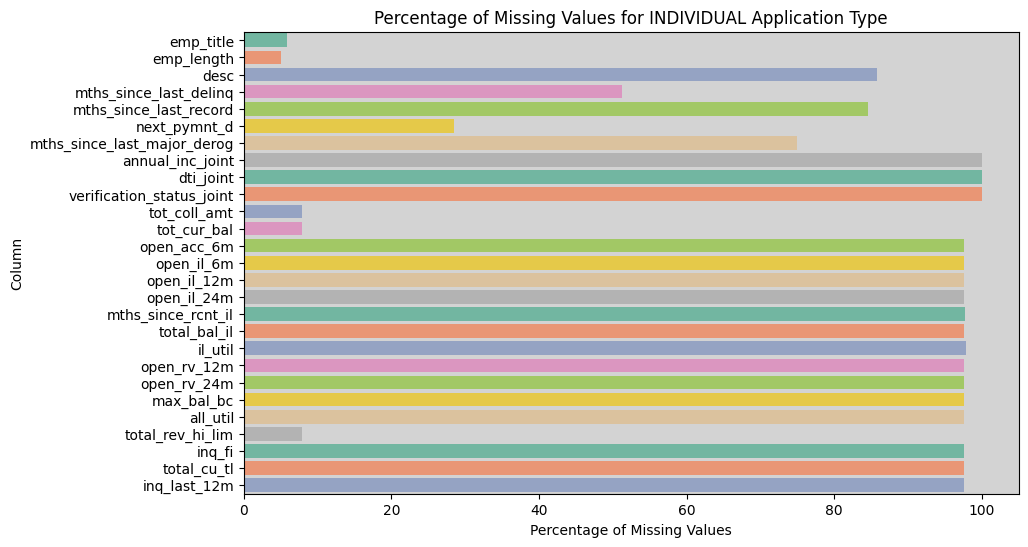

In [237]:
# Obtener el porcentaje de valores faltantes para el tipo de aplicación 'INDIVIDUAL'
individual_na_percentages = df[df['application_type'] == 'INDIVIDUAL'].isna().mean() * 100

# Filtrar columnas con más del 5% de valores faltantes
individual_na_percentages = individual_na_percentages[individual_na_percentages > 5]

# Configurar la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras usando Seaborn
sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set2')

# Agregar etiquetas y título
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for INDIVIDUAL Application Type')

# Personaliza el gráfico y el color de fondo
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Mostrar la trama
plt.show()

In [238]:
df.shape

(887379, 74)

eliminar registros CONJUNTOS para conservar todos los valores para el tipo de aplicación INDIVIDUAL

In [239]:
df = df[df['application_type'] != 'JOINT']

In [240]:
df.shape

(886868, 74)

In [241]:
columns_to_drop = [i for i in df.columns if 'joint' in i]

columns_to_drop.append('application_type')

In [242]:
df.drop(columns=columns_to_drop, inplace=True)

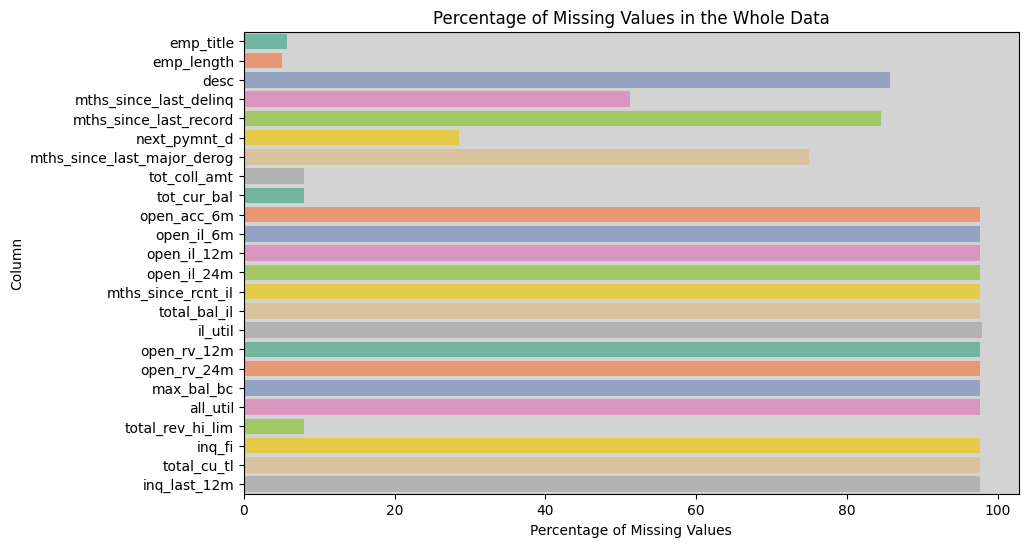

In [243]:
# Obtener el porcentaje de valores faltantes para todo el DataFrame
na_percentages = df.isna().mean() * 100

# Filtrar columnas con más del 5% de valores faltantes
na_percentages = na_percentages[na_percentages > 5]

# Configurar la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras usando Seaborn
sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set2')

# Agregar etiquetas y título
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values in the Whole Data')

# Personaliza el gráfico y el color de fondo
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Mostrar la trama
plt.show()

In [244]:
columns_to_drop = []

for i in df.columns:

  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

In [245]:
df.drop(columns=columns_to_drop, inplace=True)

In [246]:
for i in df.columns:

  print({i: df[i].nunique()})

{'id': 886868}
{'member_id': 886868}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68701}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299159}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49345}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 886868}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4000}
{'delinq_2yrs': 29}
{'earliest_cr_line': 696}
{'inq_last_6mths': 28}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73738}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248246}
{'out_prncp_inv': 266137}
{'total_pymnt': 506637}
{'total_pymnt_inv': 506515}
{'total_rec_prncp': 260185}
{'total_rec_int': 324623}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232437}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 12}
{'

In [247]:
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})

{'term': term
36 months    620886
60 months    265982
Name: count, dtype: int64}
{'grade': grade
B    254433
C    245717
A    148184
D    139419
E     70614
F     23022
G      5479
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'pymnt_plan': pymnt_plan
n    886858
y        10
Name: count, dtype: int64}
{'initial_list_status': initial_list_status
f    456703
w    430165
Name: count, dtype: int64}
{'policy_code': policy_code
1.0    886868
Name: count, dtype: int64}
{'acc_now_delinq': acc_now_delinq
0.0     882726
1.0       3865
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64}


In [248]:
df.drop(columns=['pymnt_plan', 'policy_code', 'acc_now_delinq'], inplace=True)

In [249]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,NaN,NaN,NaN


In [250]:
df[['grade', 'sub_grade']].head(5)

,grade,sub_grade
0,B,B2
1,C,C4
2,C,C5
3,C,C1
4,B,B5


In [251]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [252]:
sub_grades = df['sub_grade'].unique()

sub_grades.sort()

sub_grades

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [253]:
df.drop(columns=['id', 'member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d'], inplace=True)

In [254]:
df.shape

(886868, 41)

In [255]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,0.0,NaN,NaN,NaN


In [256]:
df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)

In [257]:
df.shape

(886868, 36)

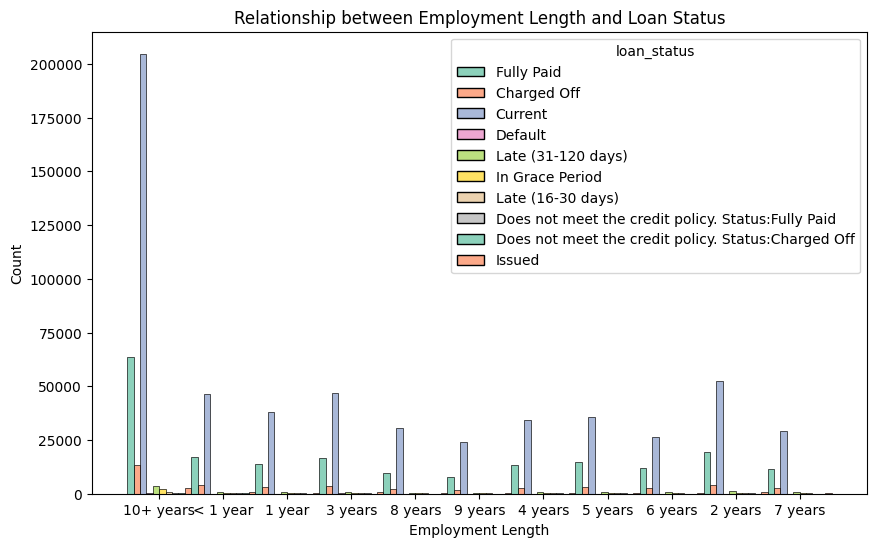

In [258]:
# Configurar la figura
plt.figure(figsize=(10, 6))

# Crea el histograma usando Seaborn
sns.histplot(data=df, x="emp_length", hue="loan_status", multiple="dodge", palette='Set2')

# Agregar título y etiquetas de eje
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Mostrar la trama
plt.show()

In [259]:
df.drop(columns=['emp_length'], inplace=True)

In [260]:
importante_features = df.columns

In [261]:
len(importante_features)

35

In [274]:
terms = pd.read_excel("input\LCDataDictionary.xlsx")

In [263]:
terms.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [264]:
feature_description = terms[terms['LoanStatNew'].isin(importante_features)][['LoanStatNew', 'Description']]

In [265]:
feature_description.reset_index(drop=True, inplace=True)

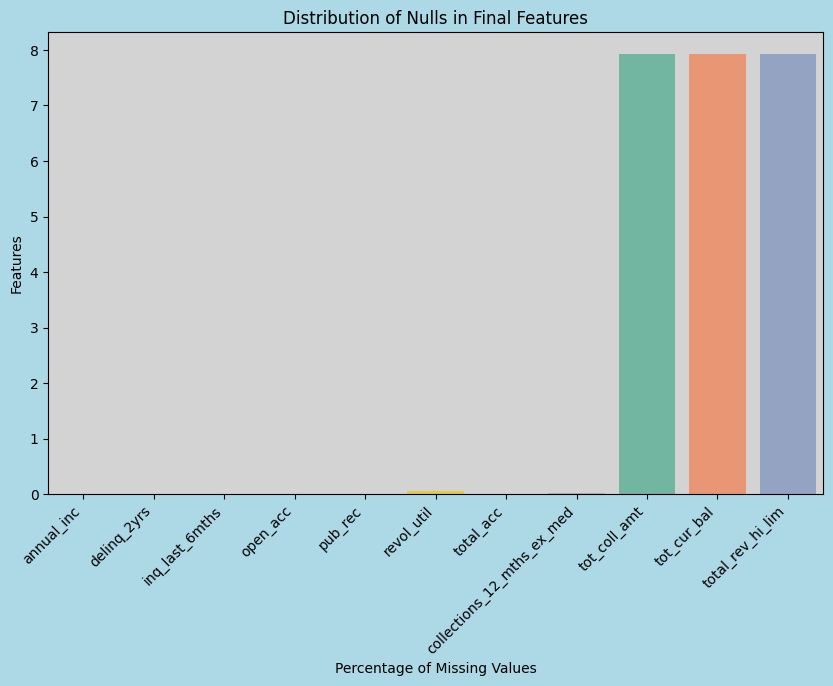

In [266]:
# Obtener el porcentaje de valores faltantes para todo el DataFrame
na_percentages = df.isna().mean() * 100

# Filtrar columnas con valores faltantes
na_percentages = na_percentages[na_percentages > 0]

# Configurar la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras usando Seaborn
sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set2')

# Agregar etiquetas y título
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Distribution of Nulls in Final Features')

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas y alinearlas a la derecha

# Personalizar el color de fondo
plt.gca().set_facecolor('lightgray')  # Color de fondo dentro del gráfico
plt.gcf().set_facecolor('lightblue')  # Color de fondo de la figura

# Mostrar la gráfica
plt.show()

In [267]:
df[na_percentages.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 886868 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  886864 non-null  float64
 1   delinq_2yrs                 886839 non-null  float64
 2   inq_last_6mths              886839 non-null  float64
 3   open_acc                    886839 non-null  float64
 4   pub_rec                     886839 non-null  float64
 5   revol_util                  886366 non-null  float64
 6   total_acc                   886839 non-null  float64
 7   collections_12_mths_ex_med  886723 non-null  float64
 8   tot_coll_amt                816592 non-null  float64
 9   tot_cur_bal                 816592 non-null  float64
 10  total_rev_hi_lim            816592 non-null  float64
dtypes: float64(11)
memory usage: 81.2 MB


In [268]:
na_percentages

annual_inc                    0.000451
delinq_2yrs                   0.003270
inq_last_6mths                0.003270
open_acc                      0.003270
pub_rec                       0.003270
revol_util                    0.056604
total_acc                     0.003270
collections_12_mths_ex_med    0.016350
tot_coll_amt                  7.924065
tot_cur_bal                   7.924065
total_rev_hi_lim              7.924065
dtype: float64

In [269]:
print(df.shape)

for i in na_percentages.index:

  if na_percentages[i] < 1:

    df.dropna(subset=[i], inplace=True)

print(df.shape)

(886868, 35)
(886253, 35)


## EDA and Visualizations

In [270]:
importante_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [271]:
features = [col for col in df.columns if df[col].nunique() > 2]



rows = (len(features) + 2) // 3

cols = 3



# Configurar la figura y el eje para las subparcelas

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

axes = axes.flatten()  # Aplanar en caso de múltiples filas



fig.patch.set_facecolor('lightgray') # Establece el color de fondo de toda la figura.



palette = sns.color_palette('Set2', len(features))



plotted_df = df.copy()

plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']

for i, col in enumerate(features):

    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1) # Establezca el alfa ligeramente transparente para una mejor visualización

    axes[i].set_title(col)



# Eliminar cualquier subparcela vacía (en caso de que el número de características no llene la cuadrícula)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])



fig.suptitle("Distributions of Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deje espacio para el título principal


plt.show()

KeyboardInterrupt: 

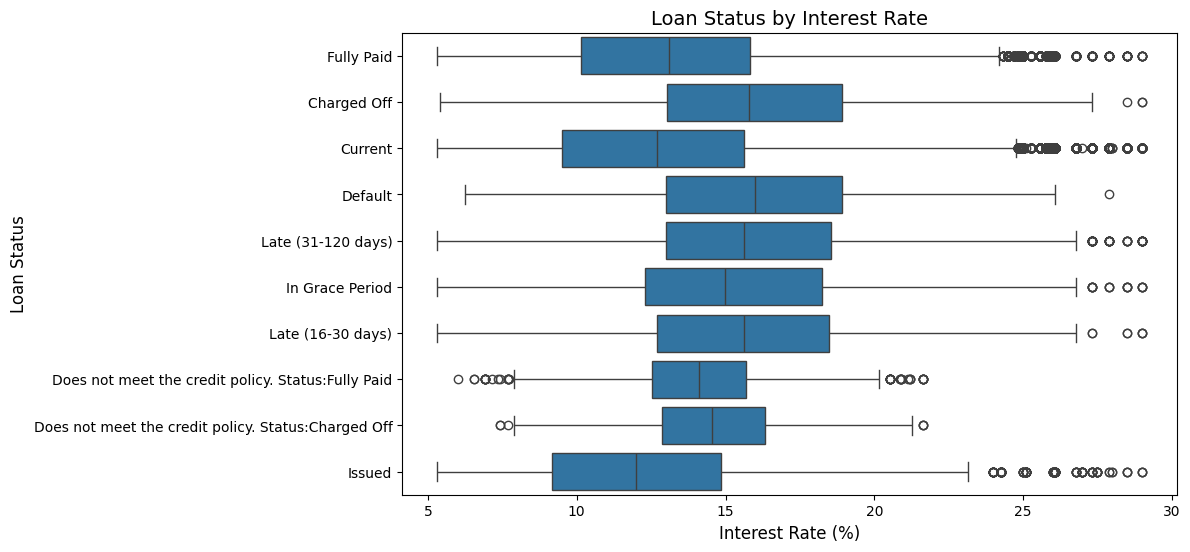

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='int_rate', y='loan_status', data=df)



plt.title('Loan Status by Interest Rate', fontsize=14)

plt.xlabel('Interest Rate (%)', fontsize=12)

plt.ylabel('Loan Status', fontsize=12)



plt.show()

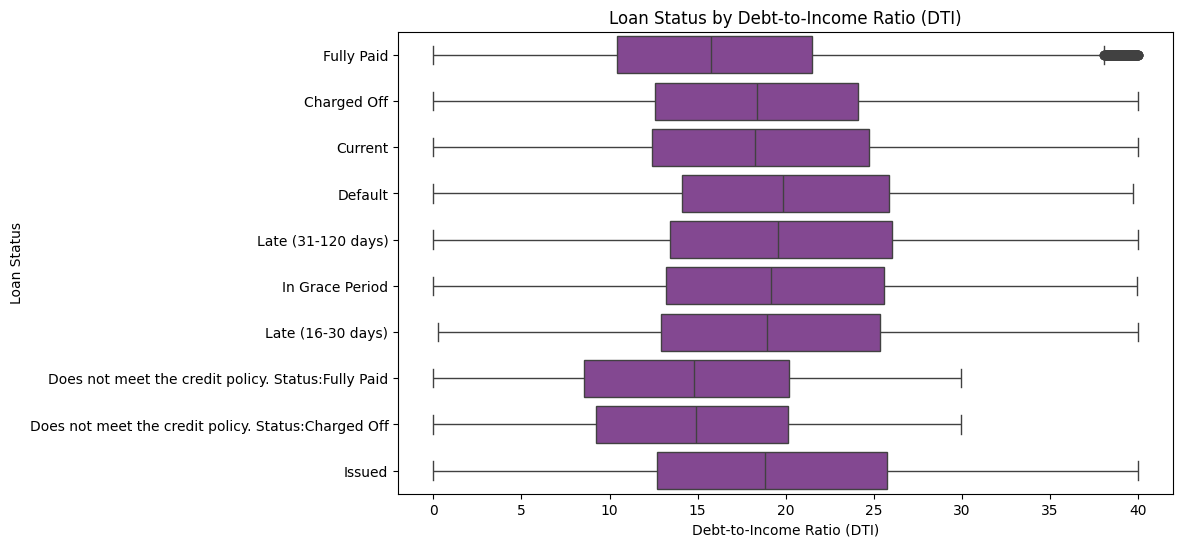

In [ ]:
plt.figure(figsize=(10, 6))



sns.boxplot(x='dti', y='loan_status', data=df, color='#8A3C9D')



plt.title('Loan Status by Debt-to-Income Ratio (DTI)')

plt.xlabel('Debt-to-Income Ratio (DTI)')

plt.ylabel('Loan Status')



plt.show()

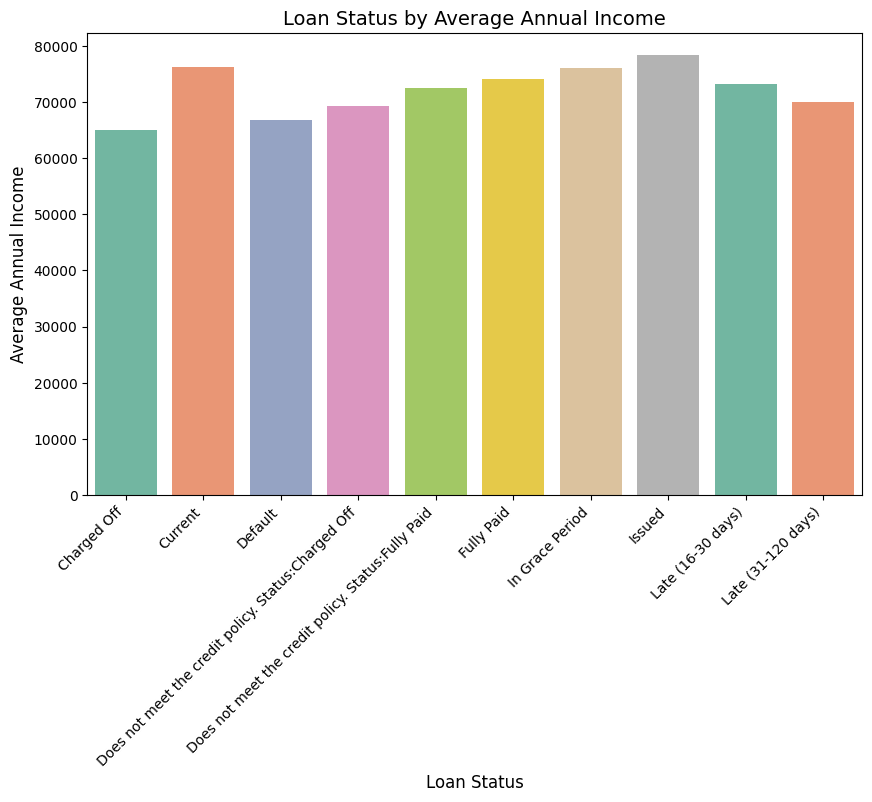

In [ ]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()



plt.figure(figsize=(10, 6))

sns.barplot(y='annual_inc',x='loan_status',palette='Set2', data=avg_income)



plt.title('Loan Status by Average Annual Income', fontsize=14)

plt.xlabel('Loan Status', fontsize=12)

plt.ylabel('Average Annual Income', fontsize=12)

plt.xticks(rotation=45, ha='right')



plt.show()

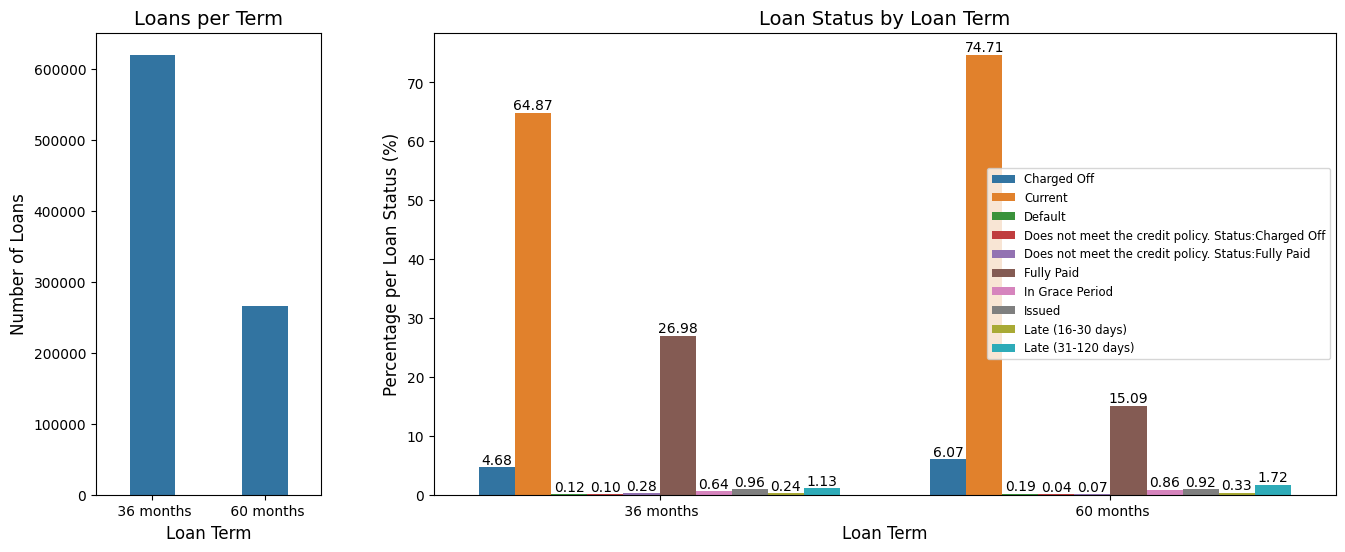

In [ ]:
loans_per_term = df['term'].value_counts().reset_index()



count_data = df.groupby(['term', 'loan_status']).size().reset_index(name='count')

count_data['percentage'] = count_data['count'] / count_data.groupby('term')['count'].transform('sum') * 100



fig = plt.figure(figsize=(16, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])



ax1 = plt.subplot(gs[0])

sns.barplot(x='term', y='count', data=loans_per_term, ax=ax1, width=0.4)

ax1.set_title('Loans per Term', fontsize=14)

ax1.set_xlabel('Loan Term', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)



ax2 = plt.subplot(gs[1])

sns.barplot(x='term', y='percentage', hue='loan_status', data=count_data, ax=ax2, width=0.8)

for p in ax2.patches:

    height = p.get_height()

    if height > 0:

        ax2.text(

            p.get_x() + p.get_width() / 2.,

            height,

            f'{height:.2f}',

            ha='center',

            va='bottom'

        )

ax2.set_title('Loan Status by Loan Term', fontsize=14)

ax2.set_xlabel('Loan Term', fontsize=12)

ax2.set_ylabel('Percentage per Loan Status (%)', fontsize=12)



ax2.legend( fontsize='small')



plt.show()

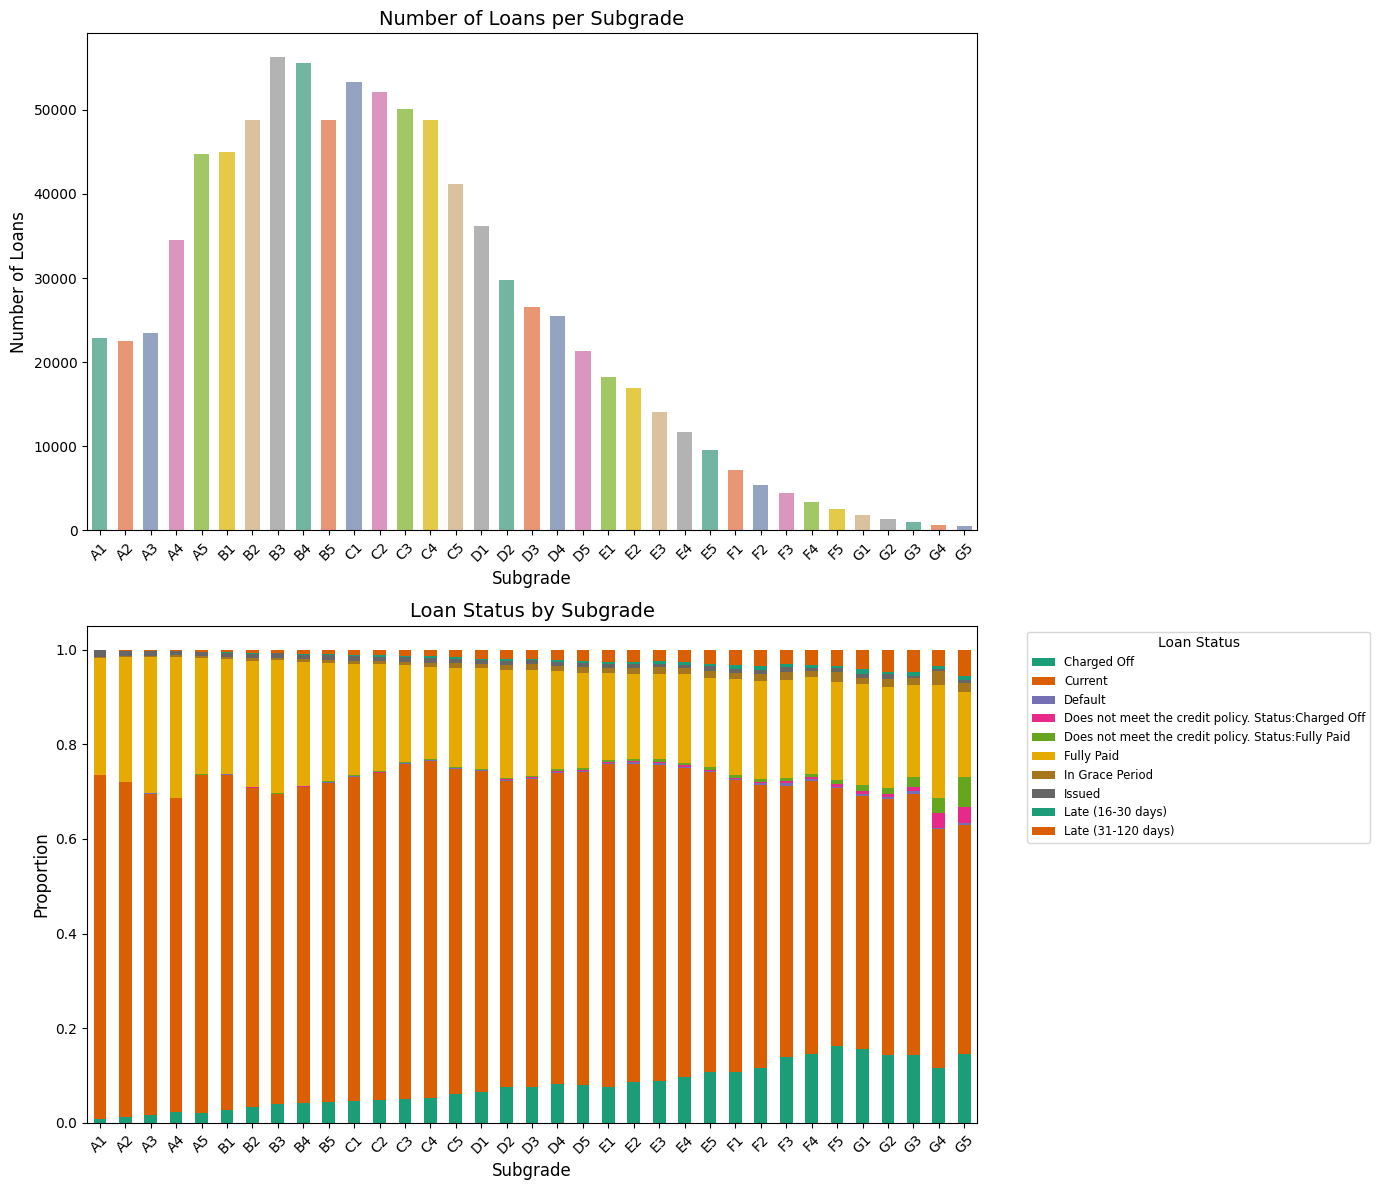

In [ ]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()



subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)



fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1, ax2 = axes[0], axes[1]



sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6,palette='Set2')

ax1.set_title('Number of Loans per Subgrade', fontsize=14)

ax1.set_xlabel('Subgrade', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)

ax1.tick_params(axis='x', rotation=45)



subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))

ax2.set_title('Loan Status by Subgrade', fontsize=14)

ax2.set_xlabel('Subgrade', fontsize=12)

ax2.set_ylabel('Proportion', fontsize=12)

ax2.tick_params(axis='x', rotation=45)

ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')



plt.tight_layout()

plt.show()

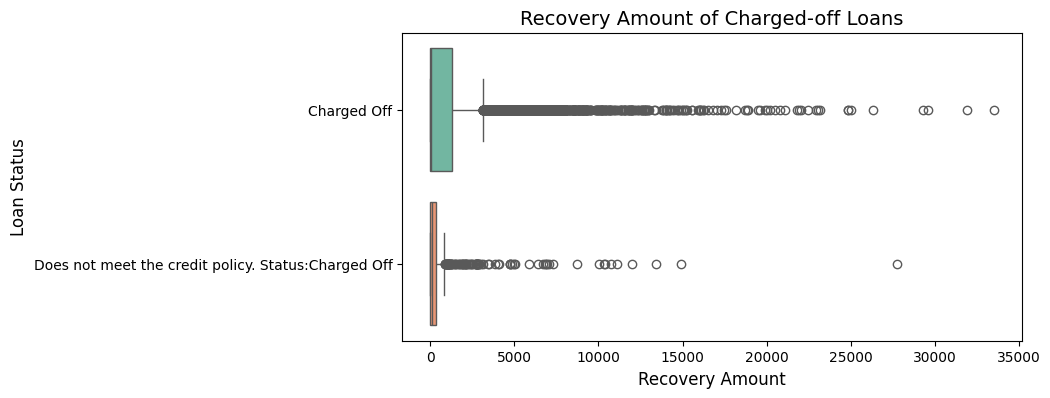

In [ ]:
charges_off_df = df[df['loan_status'].str.contains('Charged Off')]



plt.figure(figsize=(8, 4))

sns.boxplot(x='recoveries', y='loan_status', data=charges_off_df,palette='Set2')



plt.title('Recovery Amount of Charged-off Loans', fontsize=14)

plt.ylabel('Loan Status', fontsize=12)

plt.xlabel('Recovery Amount', fontsize=12)



plt.show()

<Figure size 800x1000 with 0 Axes>

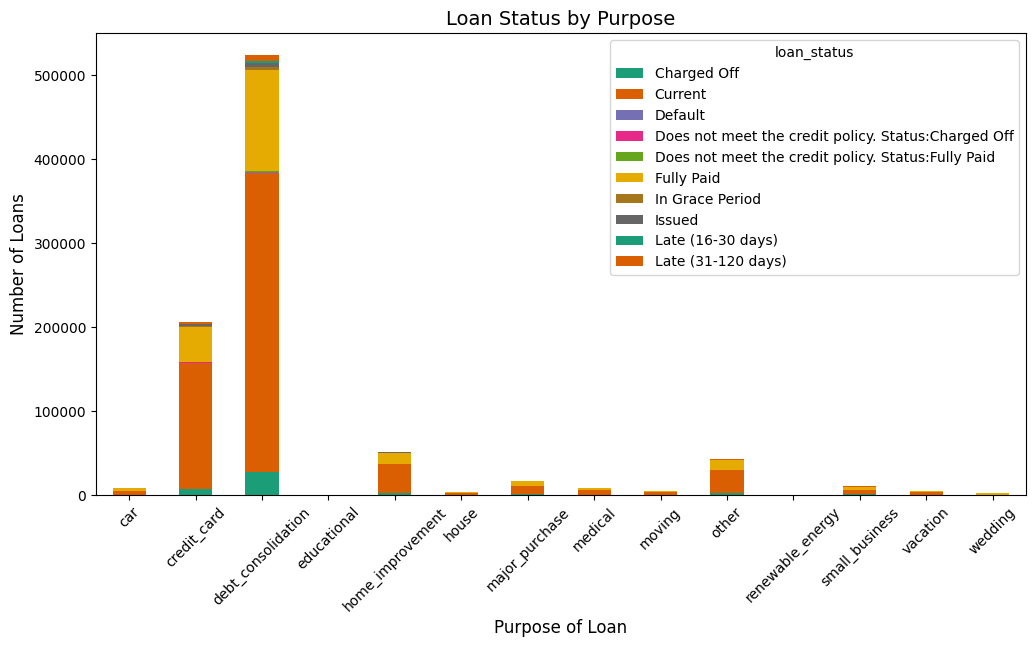

In [ ]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 10))

purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))



plt.title('Loan Status by Purpose', fontsize=14)

plt.xlabel('Purpose of Loan', fontsize=12)

plt.ylabel('Number of Loans', fontsize=12)

plt.xticks(rotation=45)



plt.show()


## Codificación

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.head()

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status
0,36 months,B2,RENT,Verified,credit_card,f
1,60 months,C4,RENT,Source Verified,car,f
2,36 months,C5,RENT,Not Verified,small_business,f
3,36 months,C1,RENT,Source Verified,other,f
4,60 months,B5,RENT,Source Verified,other,f


In [ ]:
for i in categorical_features.columns:

  print({i: categorical_features[i].value_counts()})

{'term': term
36 months    620387
60 months    265866
Name: count, dtype: int64}
{'sub_grade': sub_grade
B3    56283
B4    55568
C1    53329
C2    52179
C3    50097
C4    48785
B5    48774
B2    48748
B1    44951
A5    44791
C5    41168
D1    36164
A4    34511
D2    29754
D3    26507
D4    25506
A3    23444
A1    22907
A2    22467
D5    21345
E1    18234
E2    16960
E3    14105
E4    11687
E5     9542
F1     7203
F2     5374
F3     4422
F4     3399
F5     2589
G1     1864
G2     1388
G3      978
G4      659
G5      571
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    442916
RENT        355748
OWN          87362
OTHER          180
NONE            44
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329259
Verified           290635
Not Verified       266359
Name: count, dtype: int64}
{'purpose': purpose
debt_consolidation    523642
credit_card           205989
home_improvement       51724
other            

In [ ]:
def sub_grades_encoding(x):

  val = 0

  if 'A' in x:

    val = 7

  elif 'B' in x:

    val = 6

  elif 'C' in x:

    val = 5

  elif 'D' in x:

    val = 4

  elif 'E' in x:

    val = 3

  elif 'F' in x:

    val = 2

  elif 'G' in x:

    val = 1



  if '1' in x:

    val += 0.8

  elif '2' in x:

    val += 0.6

  elif '3' in x:

    val += 0.4

  elif '4' in x:

    val += 0.2

  elif '5' in x:

    val += 0.0



  return val



def verification_status(x):

  if x == 'Not Verified':

    return 0

  return 1

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)

In [ ]:
df['sub_grade'].unique()

array([6.6, 5.2, 5. , 5.8, 6. , 7.2, 3.8, 2.6, 5.4, 6.8, 4.8, 7.8, 6.4,
       6.2, 5.6, 4.6, 7.4, 7. , 4. , 7.6, 3.2, 4.4, 4.2, 2.4, 3.4, 2.2,
       2.8, 3. , 1.2, 3.6, 1.4, 1.6, 1.8, 2. , 1. ])

In [ ]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()



df['term'] = label_encoder.fit_transform(df['term'])

df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [ ]:
df['verification_status'] = df['verification_status'].apply(verification_status)

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.isna().sum()

home_ownership    0
purpose           0
dtype: int64

In [ ]:
encoded_features = pd.get_dummies(categorical_features, dtype=int)

encoded_features.head(3)

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.drop(columns=categorical_features.columns, inplace=True)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,0,10.65,162.87,6.6,24000.0,1,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,NaN,NaN,NaN,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,5.2,30000.0,1,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,NaN,NaN,NaN,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,5.0,12252.0,0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

## Manejo de valores faltantes

In [ ]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
annual_inc                        0
verification_status               0
loan_status                       0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [ ]:
# # Importando las bibliotecas necesarias

# from sklearn.experimental import enable_iterative_imputer # Para habilitar IterativeImputer

# from sklearn.impute import IterativeImputer

# # Inicializar IterativeImputer con la configuración optimizada

# imputer = IterativeImputer(max_iter=5, random_state=0)

# # Ajustar y transformar los datos

# imputed_data = imputer.fit_transform(df)

# # Convertir de nuevo a un DataFrame si es necesario

# imputed_df = pd.DataFrame(imputed_data, columnas=df.columns)

'the IterativeImputer_credit.csv holds the imputed data'

In [275]:
imputed_df = pd.read_csv("input\IterativeImputer_credit.csv")

In [ ]:
imputed_df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
annual_inc                    0
verification_status           0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
tot_coll_amt                  0
tot_cur_

In [ ]:
imputed_df.shape

(886253, 53)

In [ ]:
imputed_df['inq_last_6mths'].value_counts()

inq_last_6mths
0.0     497247
1.0     241225
2.0      94020
3.0      37365
4.0      10737
5.0       3982
6.0       1227
7.0        194
8.0        121
9.0         47
10.0        23
11.0        15
12.0        14
15.0         8
14.0         5
13.0         4
16.0         3
18.0         3
24.0         2
17.0         2
19.0         2
33.0         1
32.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: count, dtype: int64

# División de datos y escalado

In [ ]:
from sklearn.model_selection import train_test_split



x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [ ]:
x_rest, X, y_rest, Y = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y, shuffle=True)

In [ ]:
X.shape, Y.shape

((88626, 52), (88626,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

# Reducción de funciones

In [276]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(x_train.columns))
pca.fit(x_train)

PCA(n_components=52)

In [ ]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

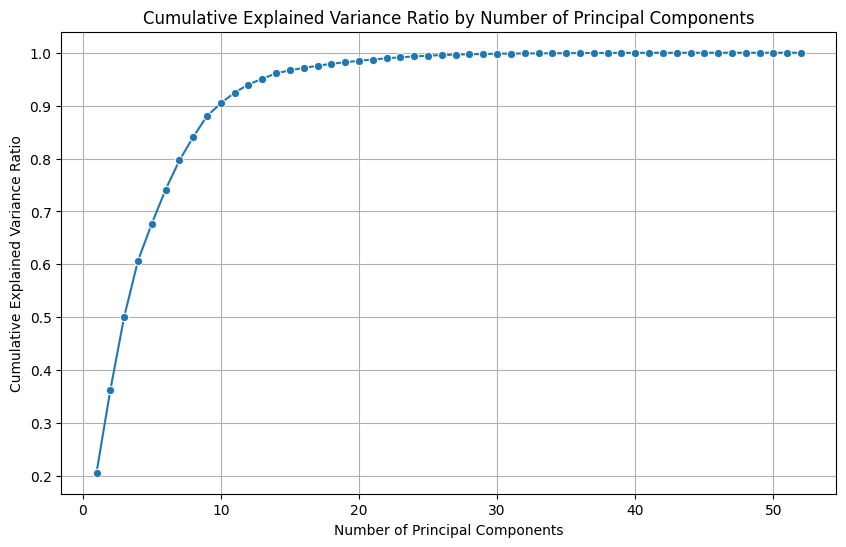

In [ ]:
# Crear un DataFrame para la relación de varianza explicada acumulada
cvr = pd.DataFrame({
    'Number of Principal Components': range(1, len(cumulative_variance_ratio) + 1),
    'Cumulative Explained Variance Ratio': cumulative_variance_ratio
})

# Configurar la figura
plt.figure(figsize=(10, 6))

# Crea el gráfico lineal usando Seaborn
sns.lineplot(data=cvr, 
             x='Number of Principal Components', 
             y='Cumulative Explained Variance Ratio', 
             marker='o')  # Agregar marcadores para mayor claridad

# Agregar título y etiquetas
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Agregar líneas de cuadrícula para una mejor legibilidad
plt.grid(True)

# Muestra la figura
plt.show()

In [ ]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

# Modelado

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

rf_classifier = RandomForestClassifier(n_estimators=500,  max_depth=7, random_state=42)

rf_classifier.fit(x_train_pca, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [ ]:
y_pred_train = rf_classifier.predict(x_train_pca)

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)

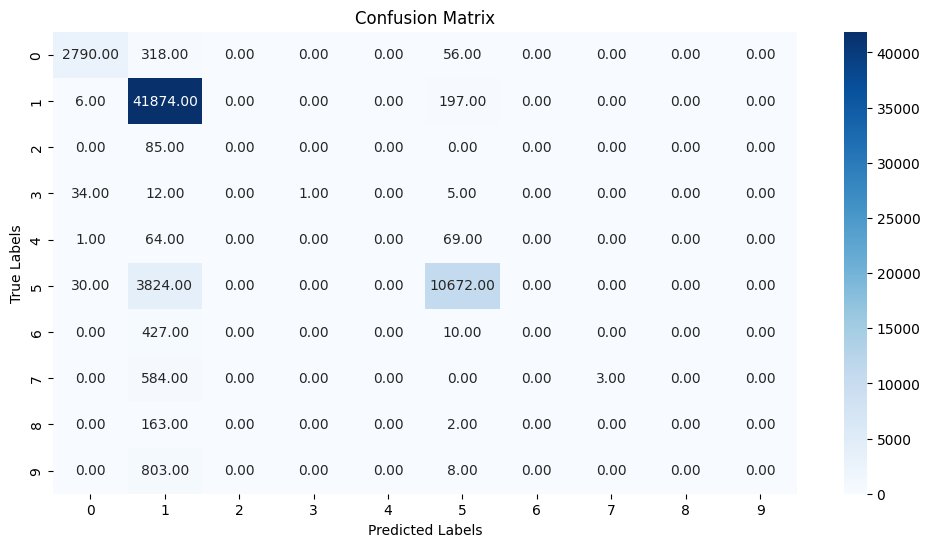

In [ ]:
# Crea un mapa de calor usando Seaborn

plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Agregar títulos y etiquetas

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      3164
         1.0       0.87      1.00      0.93     42077
         2.0       0.00      0.00      0.00        85
         3.0       1.00      0.02      0.04        52
         4.0       0.00      0.00      0.00       134
         5.0       0.97      0.73      0.84     14526
         6.0       0.00      0.00      0.00       437
         7.0       1.00      0.01      0.01       587
         8.0       0.00      0.00      0.00       165
         9.0       0.00      0.00      0.00       811

    accuracy                           0.89     62038
   macro avg       0.48      0.26      0.27     62038
weighted avg       0.88      0.89      0.87     62038



In [ ]:
f1_score(y_train, y_pred_train, average='weighted')

0.8725165775428758

In [ ]:
y_pred_test = rf_classifier.predict(x_test_pca)

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

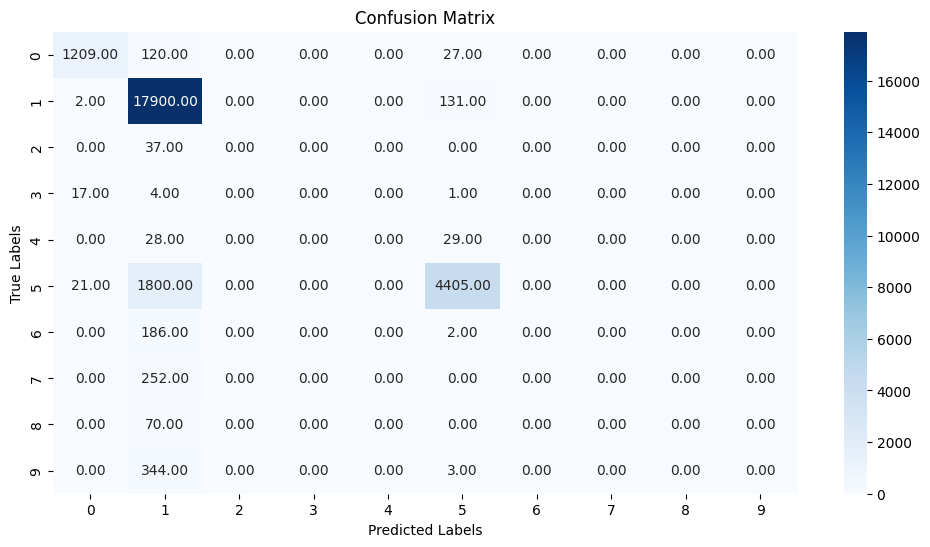

In [ ]:
# Crea un mapa de calor usando Seaborn

plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Agregar títulos y etiquetas

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1356
         1.0       0.86      0.99      0.92     18033
         2.0       0.00      0.00      0.00        37
         3.0       0.00      0.00      0.00        22
         4.0       0.00      0.00      0.00        57
         5.0       0.96      0.71      0.81      6226
         6.0       0.00      0.00      0.00       188
         7.0       0.00      0.00      0.00       252
         8.0       0.00      0.00      0.00        70
         9.0       0.00      0.00      0.00       347

    accuracy                           0.88     26588
   macro avg       0.28      0.26      0.27     26588
weighted avg       0.86      0.88      0.86     26588



In [ ]:
f1_score(y_test, y_pred_test, average='weighted')

0.8641512391169216

## XGBoost

In [ ]:
from xgboost import XGBClassifier



model = XGBClassifier(

    n_estimators=500,        # Número de rondas de refuerzo

    learning_rate=0.1,       # Contracción del tamaño del paso para evitar el sobreajuste

    max_depth=3,             # Profundidad máxima de un árbol

    subsample=0.8,           # Relación de submuestras de los datos de entrenamiento

    colsample_bytree=0.8,    # Relación de submuestras de características para cada árbol

    gamma=0,                 # Reducción mínima de pérdida requerida para realizar una partición adicional

    reg_lambda=1,            # Término de regularización L2

    objective='multi:softmax' # Para clasificación multiclase (use 'binary:logistic' para binario)
)

In [ ]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [230]:
y_pred_train_xgb = model.predict(x_train_pca)

cm = confusion_matrix(y_train, y_pred_train_xgb)

# Crea un mapa de calor usando Seaborn

plt.figure(figsize=(12, 6))  # Set the figure size

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)



# Agregar títulos y etiquetas

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_train, y_pred_train_xgb))

f1_score(y_train, y_pred_train_xgb, average='weighted')

NotFittedError: need to call fit or load_model beforehand

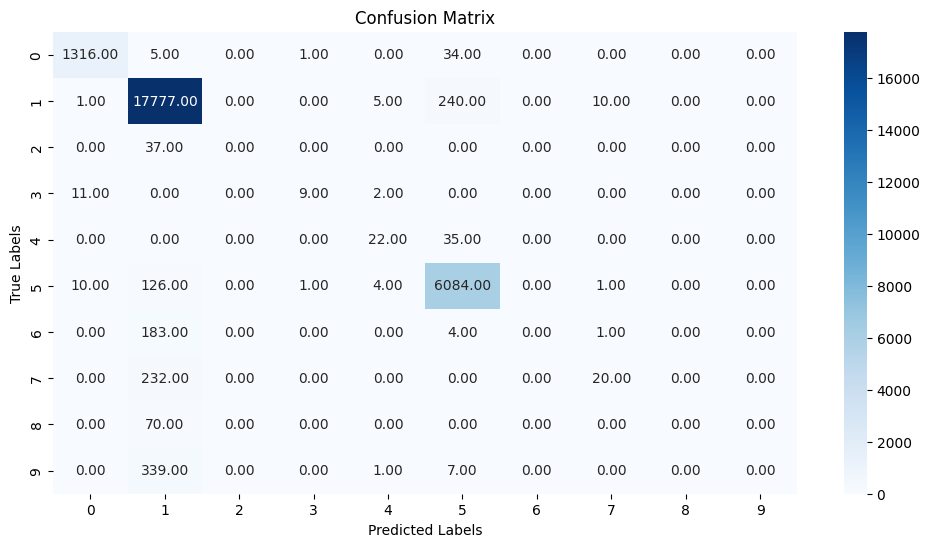

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1356
         1.0       0.95      0.99      0.97     18033
         2.0       0.00      0.00      0.00        37
         3.0       0.82      0.41      0.55        22
         4.0       0.65      0.39      0.48        57
         5.0       0.95      0.98      0.96      6226
         6.0       0.00      0.00      0.00       188
         7.0       0.62      0.08      0.14       252
         8.0       0.00      0.00      0.00        70
         9.0       0.00      0.00      0.00       347

    accuracy                           0.95     26588
   macro avg       0.50      0.38      0.41     26588
weighted avg       0.92      0.95      0.93     26588



0.9334880838755031

In [210]:
y_pred_test_xgb = model.predict(x_test_pca)

cm = confusion_matrix(y_test, y_pred_test_xgb)

# Crea un mapa de calor usando Seaborn

plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura

sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)


# Agregar títulos y etiquetas

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()

print(classification_report(y_test, y_pred_test_xgb))

f1_score(y_test, y_pred_test_xgb, average='weighted')

In [211]:
label_encoder.classes_

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

## XGBoost en todos los datos

In [212]:
x = imputed_df.drop(columns=['loan_status'])

y = imputed_df['loan_status']

In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [214]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [215]:
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = pd.DataFrame(x_test, columns=x.columns)

In [216]:
pca = PCA(n_components=25)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

In [217]:
model.fit(x_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

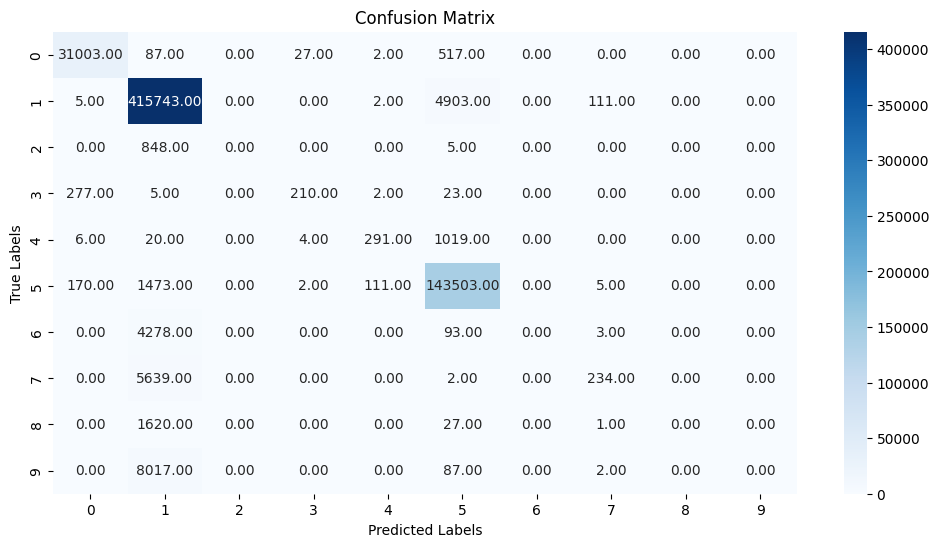

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     31636
         1.0       0.95      0.99      0.97    420764
         2.0       0.00      0.00      0.00       853
         3.0       0.86      0.41      0.55       517
         4.0       0.71      0.22      0.33      1340
         5.0       0.96      0.99      0.97    145264
         6.0       0.00      0.00      0.00      4374
         7.0       0.66      0.04      0.08      5875
         8.0       0.00      0.00      0.00      1648
         9.0       0.00      0.00      0.00      8106

    accuracy                           0.95    620377
   macro avg       0.51      0.36      0.39    620377
weighted avg       0.93      0.95      0.94    620377

Accuracy Train: 0.9526207451275596
F1 Score Trian: 0.9363736352660101


In [218]:
y_pred_train_xgb = model.predict(x_train_pca)
cm = confusion_matrix(y_train, y_pred_train_xgb)
# Crea un mapa de calor usando Seaborn
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Agregar títulos y etiquetas
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_train, y_pred_train_xgb))

Accuracy_Train = accuracy_score(y_train, y_pred_train_xgb)
F1_Score_Train = f1_score(y_train, y_pred_train_xgb, average='weighted')

print(f"Accuracy Train: {Accuracy_Train}")
print(f"F1 Score Trian: {F1_Score_Train}")

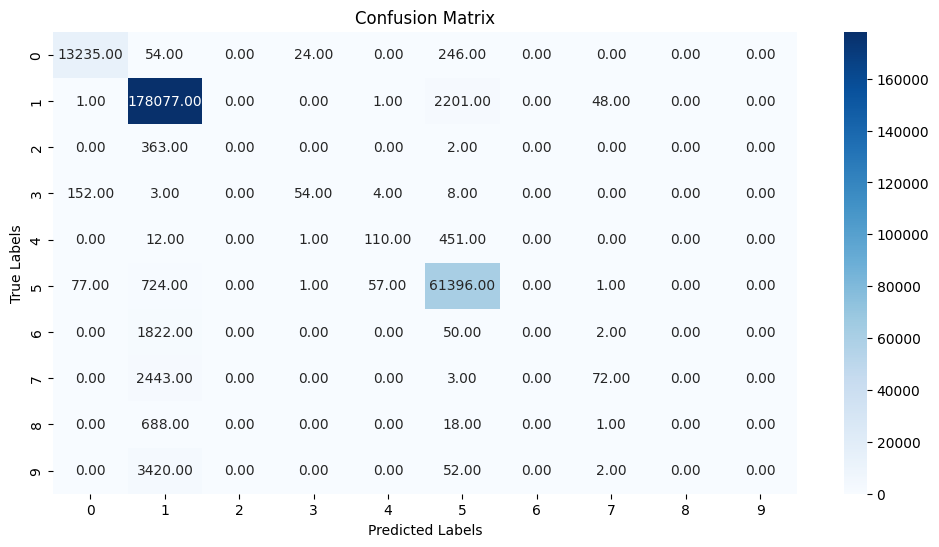

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     13559
         1.0       0.95      0.99      0.97    180328
         2.0       0.00      0.00      0.00       365
         3.0       0.68      0.24      0.36       221
         4.0       0.64      0.19      0.29       574
         5.0       0.95      0.99      0.97     62256
         6.0       0.00      0.00      0.00      1874
         7.0       0.57      0.03      0.05      2518
         8.0       0.00      0.00      0.00       707
         9.0       0.00      0.00      0.00      3474

    accuracy                           0.95    265876
   macro avg       0.48      0.34      0.36    265876
weighted avg       0.92      0.95      0.93    265876

Accuracy Test: 0.9513607847267147
F1 Score Test: 0.934891058138073


In [219]:
y_pred_test_xgb = model.predict(x_test_pca)
cm = confusion_matrix(y_test, y_pred_test_xgb)
# Crea un mapa de calor usando Seaborn
plt.figure(figsize=(12, 6))  # Establecer el tamaño de la figura
sns.heatmap(cm, annot=True, fmt='0.2f', cmap='Blues', cbar=True)

# Agregar títulos y etiquetas
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(y_test, y_pred_test_xgb))

Accuracy_Test = accuracy_score(y_test, y_pred_test_xgb)
F1_Score_Test = f1_score(y_test, y_pred_test_xgb, average='weighted')

print(f"Accuracy Test: {Accuracy_Test}")
print(f"F1 Score Test: {F1_Score_Test}")

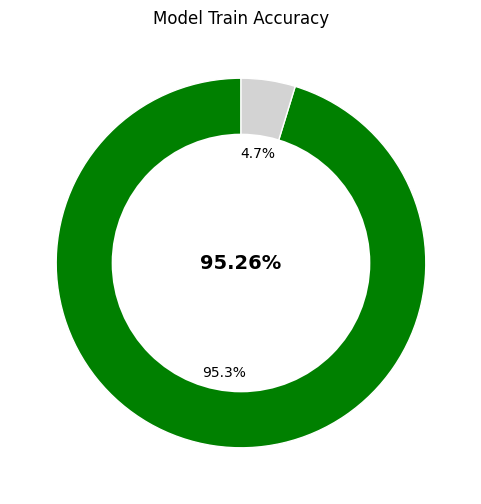

In [220]:
# Cree un gráfico circular con una sola porción que represente la precisión
plt.figure(figsize=(6, 6))  # Ajuste el tamaño según sea necesario
plt.pie([round(Accuracy_Train*100, 2), 100 - round(Accuracy_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Agrega un círculo en el centro para crear el efecto de dona.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Agregar texto de precisión en el centro
plt.text(0, 0, f'{round(Accuracy_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Agregar un título
plt.title('Model Train Accuracy')

# Mostrar el plot
plt.show()

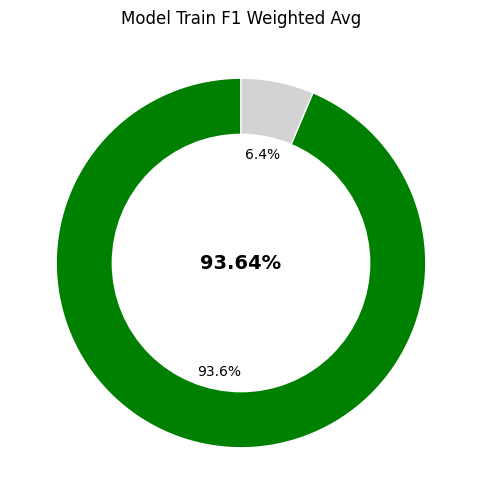

In [221]:
plt.figure(figsize=(6, 6))  # Ajuste el tamaño según sea necesario
plt.pie([round(F1_Score_Train*100, 2), 100 - round(F1_Score_Train*100, 2)],
        colors=['green', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Agrega un círculo en el centro para crear el efecto de dona.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Agregar texto de precisión en el centro
plt.text(0, 0, f'{round(F1_Score_Train*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Agregar un título
plt.title('Model Train F1 Weighted Avg')

# Mostrar el plot
plt.show()

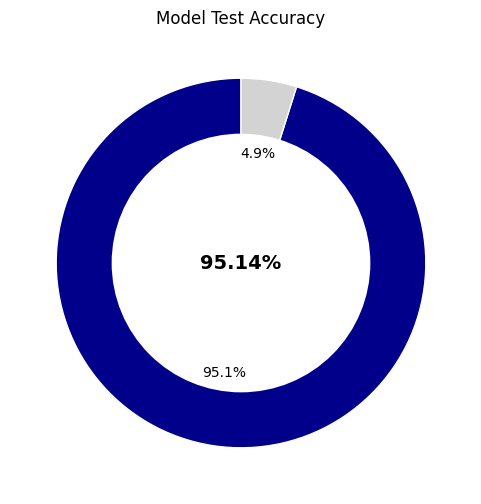

In [222]:
# Cree un gráfico circular con una sola porción que represente la precisión
plt.figure(figsize=(6, 6))  # Ajuste el tamaño según sea necesario
plt.pie([round(Accuracy_Test*100, 2), 100 - round(Accuracy_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Agrega un círculo en el centro para crear el efecto de dona.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Agregar texto de precisión en el centro
plt.text(0, 0, f'{round(Accuracy_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Agregar un título
plt.title('Model Test Accuracy')

# Mostrar la trama
plt.show()

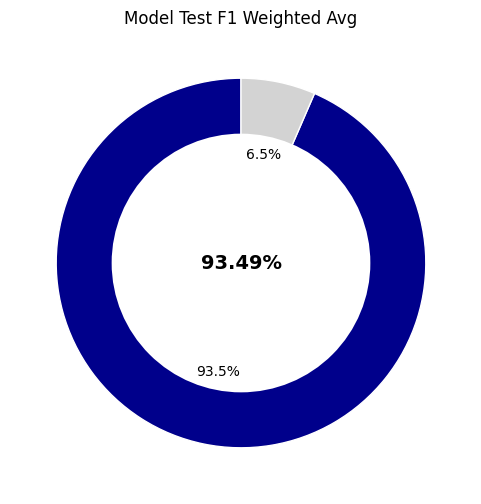

In [223]:
plt.figure(figsize=(6, 6)) # Ajuste el tamaño según sea necesario
plt.pie([round(F1_Score_Test*100, 2), 100 - round(F1_Score_Test*100, 2)],
        colors=['darkblue', 'lightgray'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'white'})

# Agrega un círculo en el centro para crear el efecto de dona.
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Agregar texto de precisión en el centro
plt.text(0, 0, f'{round(F1_Score_Test*100, 2):.2f}%', ha='center', va='center', fontsize=14, fontweight='bold')

# Agregar un título
plt.title('Model Test F1 Weighted Avg')

# Mostrar el plot
plt.show()

In [225]:
print("Felcitaciones lograste crear un modelo")

Felcitaciones lograste crear un modelo
